In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
df_train=pd.read_csv('../input/titanic/train.csv')
df_test=pd.read_csv('../input/titanic/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Null data check

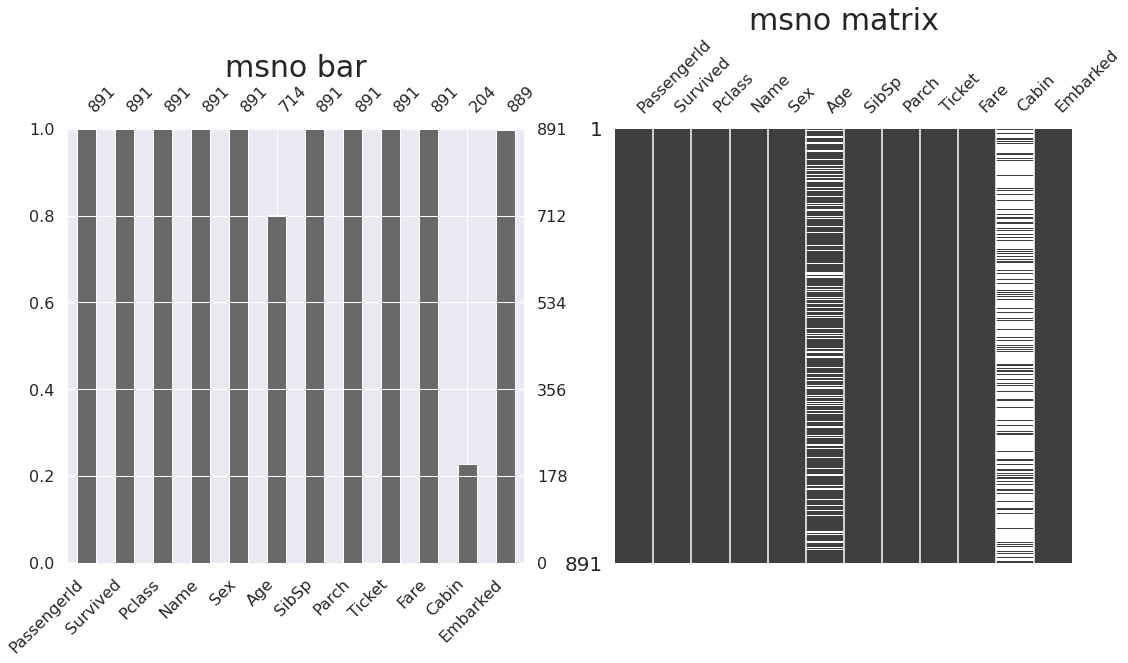

In [4]:
fg,ax=plt.subplots(1,2,figsize=(18,8))
msno.bar(df_train.iloc[:,:],ax=ax[0])
ax[0].set_title('msno bar')
msno.matrix(df_train.iloc[:,:],ax=ax[1])
ax[1].set_title('msno matrix')
plt.show()

In [5]:
for col in df_train.columns:
    print("column : {:>11}'s null data ratio : {:.2f}%".format(col,(df_train[col].isnull().sum()/df_train[col].shape[0])*100))

column : PassengerId's null data ratio : 0.00%
column :    Survived's null data ratio : 0.00%
column :      Pclass's null data ratio : 0.00%
column :        Name's null data ratio : 0.00%
column :         Sex's null data ratio : 0.00%
column :         Age's null data ratio : 19.87%
column :       SibSp's null data ratio : 0.00%
column :       Parch's null data ratio : 0.00%
column :      Ticket's null data ratio : 0.00%
column :        Fare's null data ratio : 0.00%
column :       Cabin's null data ratio : 77.10%
column :    Embarked's null data ratio : 0.22%


Target lable check

Text(0.5, 1.0, 'Survived')

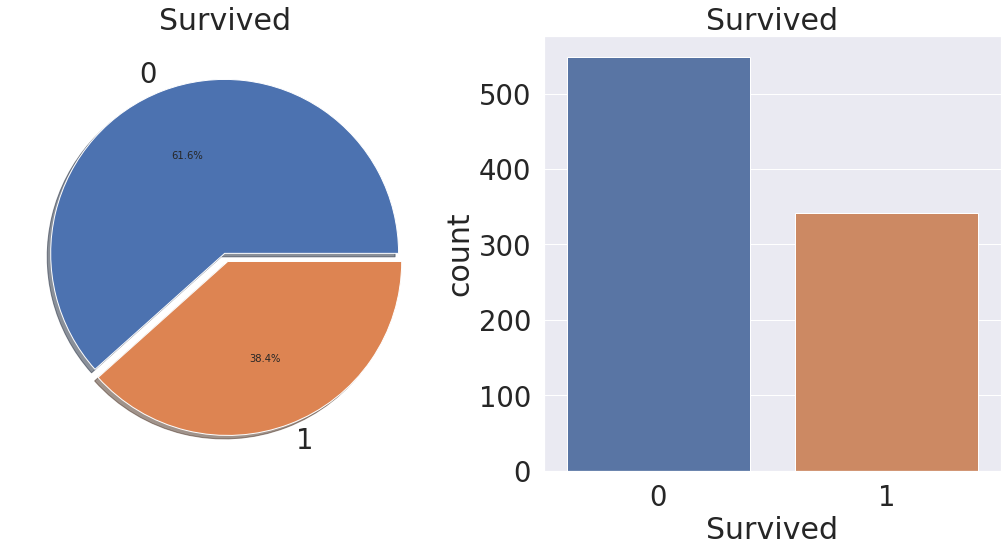

In [6]:
fg,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(ax=ax[0],explode=[0.,0.05],shadow=True,autopct='%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_title('Survived')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')

EDA-PClass

In [7]:
df_train[['Pclass','Survived']].head()
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

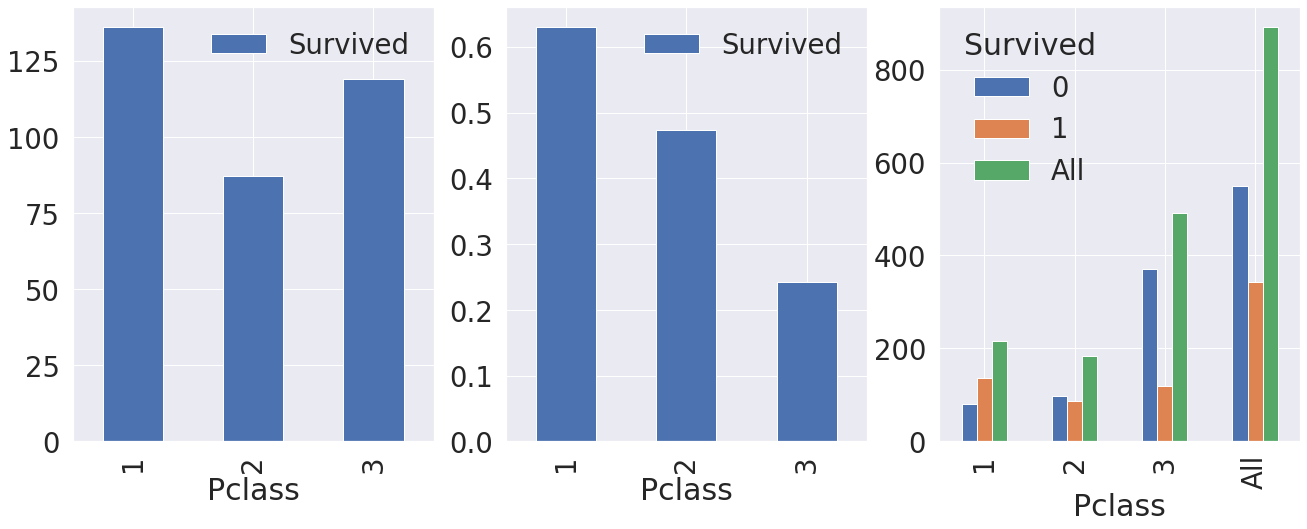

In [8]:
fig,ax=plt.subplots(1,3,figsize=(22,8))
df_train[['Pclass','Survived']].groupby('Pclass',as_index=True).sum().plot.bar(ax=ax[0]) #생존수
df_train[['Pclass','Survived']].groupby('Pclass',as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[1]) #생존률
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).plot.bar(ax=ax[2])

Text(0.5, 1.0, 'Pclass : Survived vs Non-Survived')

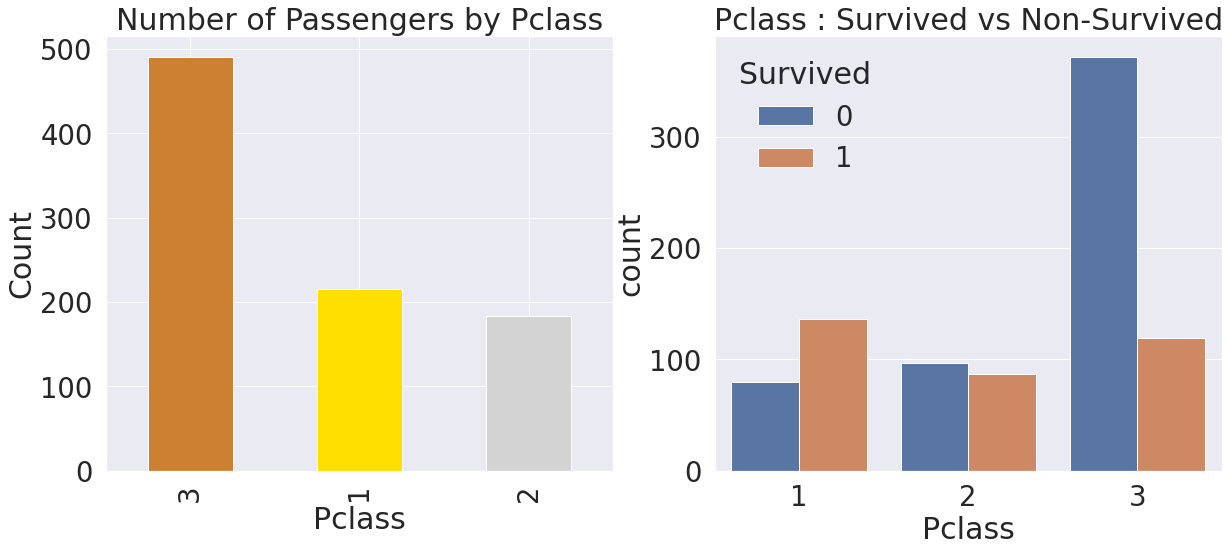

In [9]:
fg,ax=plt.subplots(1,2,figsize=(20,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0],color=['#CD7F32','#FFDF00','#D3D3D3'])
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of Passengers by Pclass')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass : Survived vs Non-Survived')

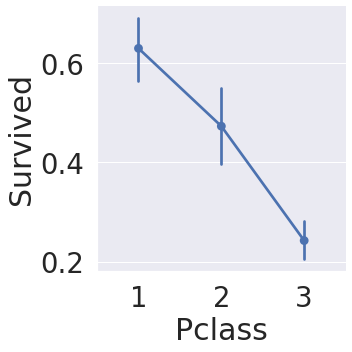

In [10]:
sns.factorplot(x='Pclass',y='Survived',data=df_train)

EDA-Sex

<AxesSubplot:xlabel='Sex'>

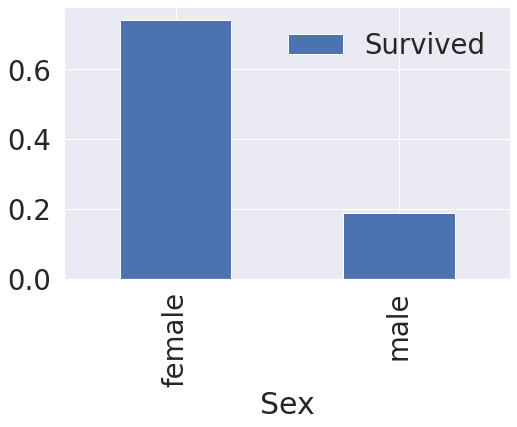

In [11]:
df_train[['Sex','Survived']].groupby('Sex').mean().plot.bar(figsize=(8,5)) #성별 생존률

In [12]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Text(0.5, 1.0, 'Sex:Survived vs Non-Survived')

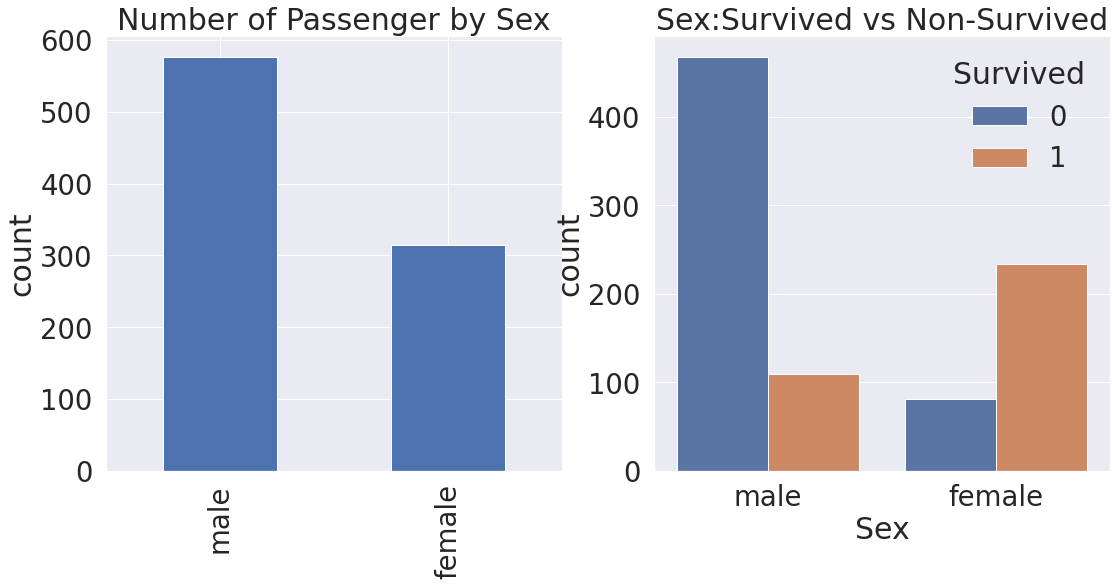

In [13]:
fg,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Sex'].value_counts().plot.bar(ax=ax[0])
ax[0].set_ylabel('count')
ax[0].set_title('Number of Passenger by Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Non-Survived')

EDA-Both Sex and Pclass

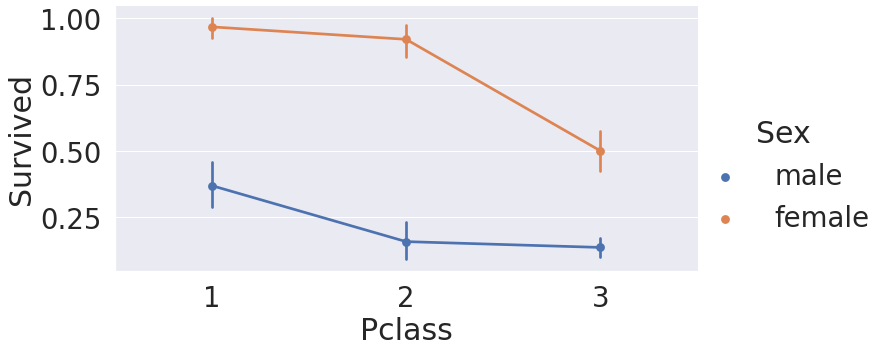

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=5,aspect=2)  #size=graph전체적인 사이즈 , aspect=graph 비율

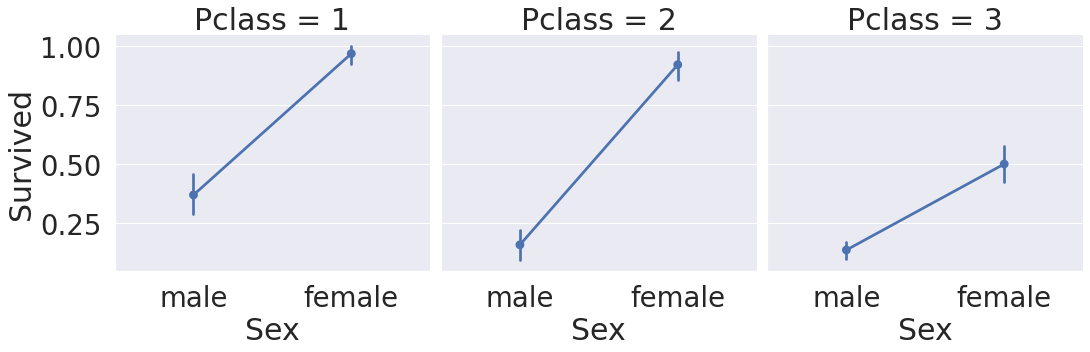

In [15]:
sns.factorplot('Sex','Survived',col='Pclass',data=df_train)

EDA-Age

In [16]:
print('제일 나이가 많은 탑승객 : {}'.format(df_train.Age.max()))
print('제일 나이가 적은 탑승객 : {}'.format(df_train.Age.min()))
print('탑승객 평균 나이 : {:.2f}'.format(df_train.Age.mean()))
print('생존한 사람의 평균 나이 : {:.2f}'.format(df_train[df_train['Survived']==1]['Age'].mean()))
print('사망한 사람의 평균 나이 : {:.2f}'.format(df_train[df_train['Survived']==0]['Age'].mean()))

제일 나이가 많은 탑승객 : 80.0
제일 나이가 적은 탑승객 : 0.42
탑승객 평균 나이 : 29.70
생존한 사람의 평균 나이 : 28.34
사망한 사람의 평균 나이 : 30.63


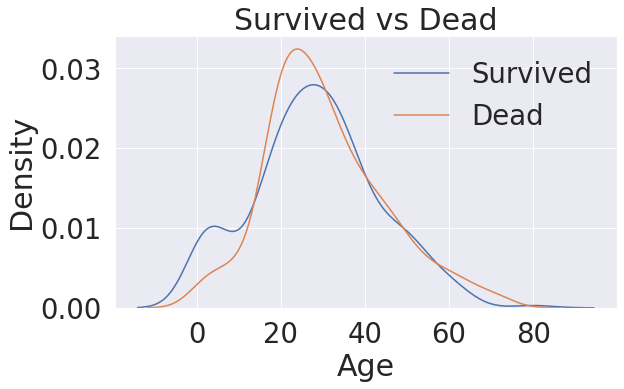

In [17]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot('Age',data=df_train[df_train['Survived']==1],ax=ax) #분포그래프
ax.set_title('Survived vs Dead')
sns.kdeplot('Age',data=df_train[df_train['Survived']==0],ax=ax)
plt.legend(['Survived','Dead'],loc='best')
plt.show()

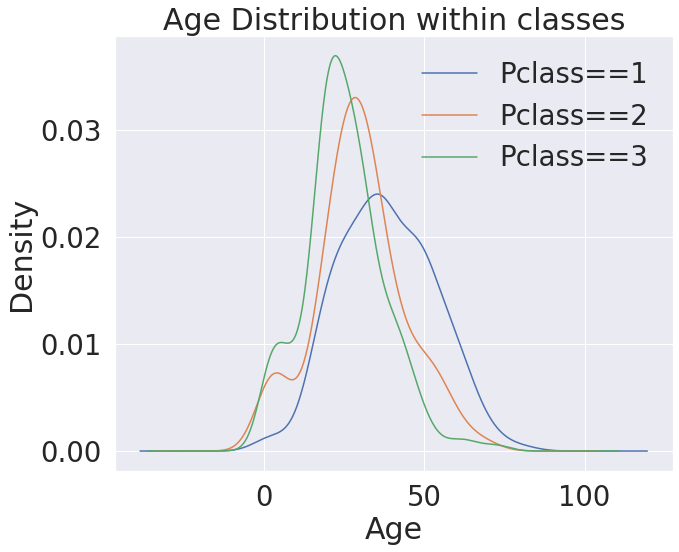

In [18]:
fig=plt.figure(figsize=(10,8))
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde') #same with : sns.kdeplot('Age',data=df_train[df_train['Pclass']==1],ax=ax)
df_train[df_train['Pclass']==2]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==3]['Age'].plot(kind='kde')
plt.title('Age Distribution within classes')
plt.xlabel('Age')
plt.legend(['Pclass==1','Pclass==2','Pclass==3'],loc='best')
#usually high class is older

Text(0.5, 1.0, 'survived ratio')

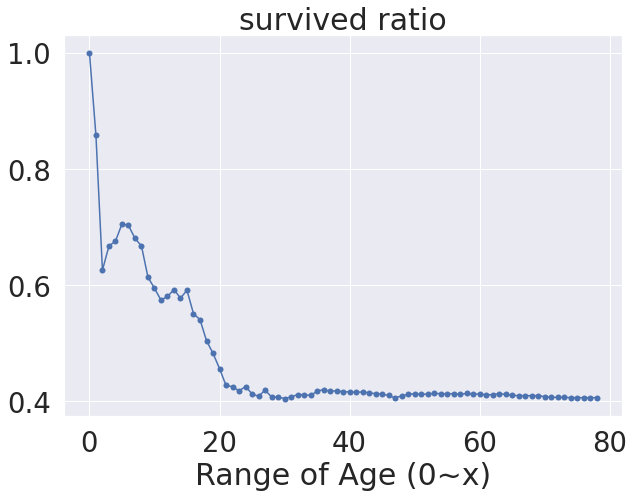

In [19]:
cumulative_survived_ratio=[]
for age in range(1,80):
    cumulative_survived_ratio.append(df_train[df_train['Age']<age]['Survived'].mean())
plt.figure(figsize=(10,7))
plt.plot(cumulative_survived_ratio,marker='o')
plt.xlabel('Range of Age (0~x)')
plt.title('survived ratio')
#나이가 어릴수록 생존확률 증가

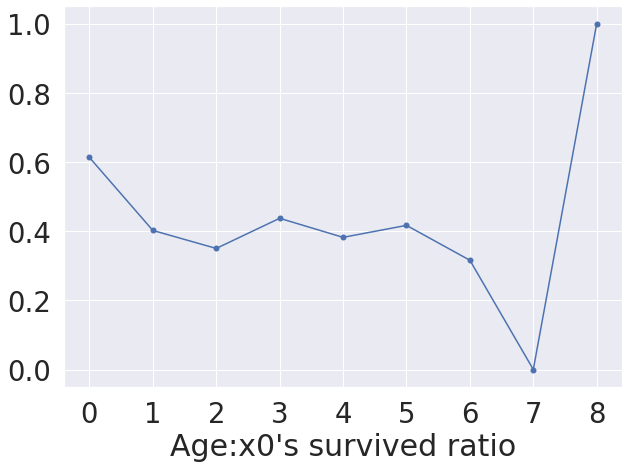

In [20]:
ages_survived_ratio=[]
for age in range(0,90,10):
    ages_survived_ratio.append(df_train[(df_train['Age']>=age) & (df_train['Age']<(age+10))]['Survived'].mean())
plt.figure(figsize=(10,7))
plt.xlabel("Age:x0's survived ratio")
plt.xticks(range(0,9,1))
plt.plot(ages_survived_ratio,marker='o')
#나이대별 생존률

EDA-Pclass , Sex, Age

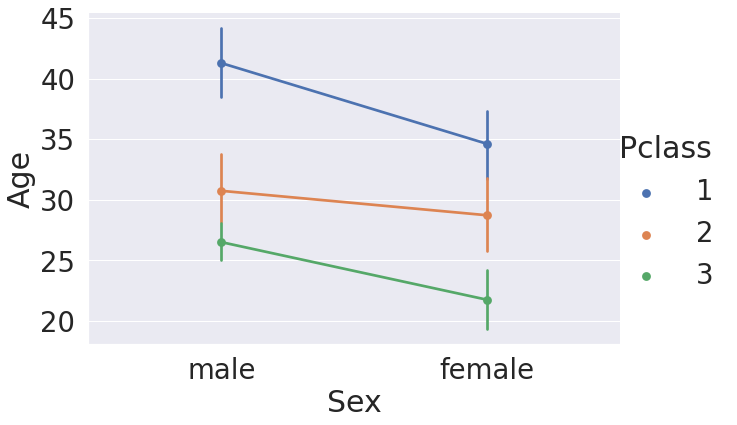

In [21]:
sns.factorplot('Sex','Age',hue='Pclass',data=df_train,size=6,aspect=1.5)
#어느 클래스든 남자가 나이가 더 많고 클래스가 높을수록 나이대가 있다.

Text(0.5, 1.0, 'Sex and Age vs Survived')

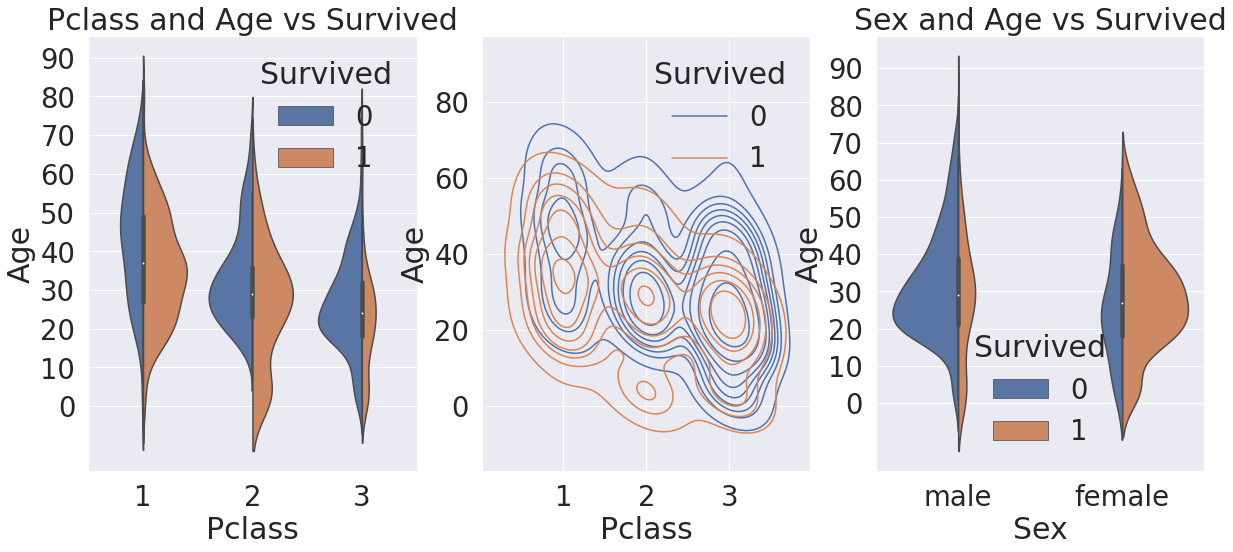

In [22]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,ax=ax[0],scale='count',split=True)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,100,10))
sns.kdeplot('Pclass','Age',hue='Survived',data=df_train,ax=ax[1])
sns.violinplot('Sex','Age',hue='Survived',data=df_train,ax=ax[2],scale='count',split=True)
ax[2].set_yticks(range(0,100,10))
ax[2].set_title('Sex and Age vs Survived')
#나이가 어릴수록 생존할 확률이 높고 여자일수록 생존확률이 높다->어린이,여자부터 챙겼다.

EDA-Embarked

Text(0.5, 1.0, 'Survival rate')

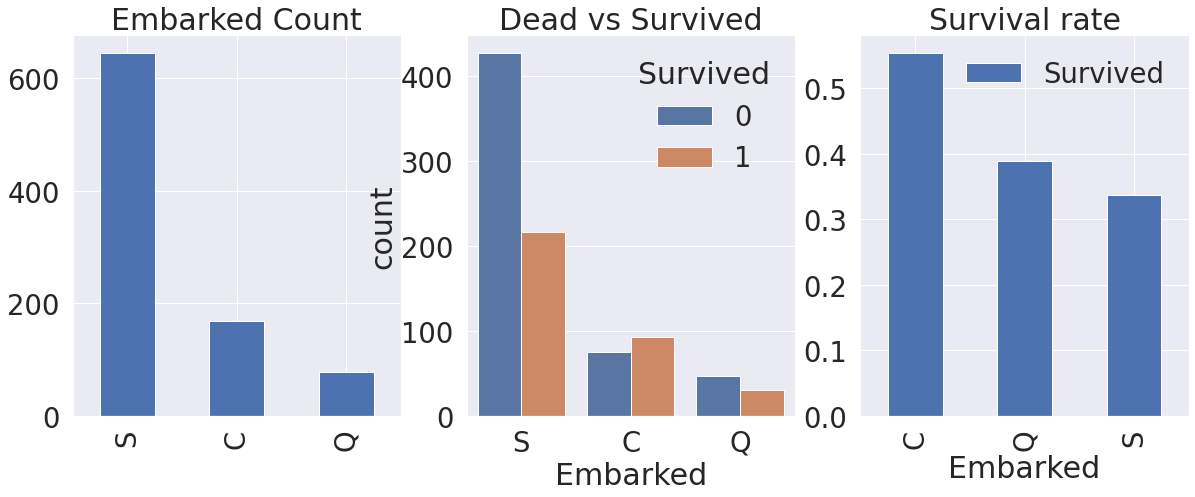

In [23]:
fig,ax=plt.subplots(1,3,figsize=(20,7))
df_train['Embarked'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Embarked Count')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Dead vs Survived')
df_train[['Embarked','Survived']].groupby('Embarked',as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survival rate')

In [24]:
pd.crosstab(df_train['Embarked'],df_train['Survived'],margins=True).style.background_gradient('summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


Text(0, 0.5, '')

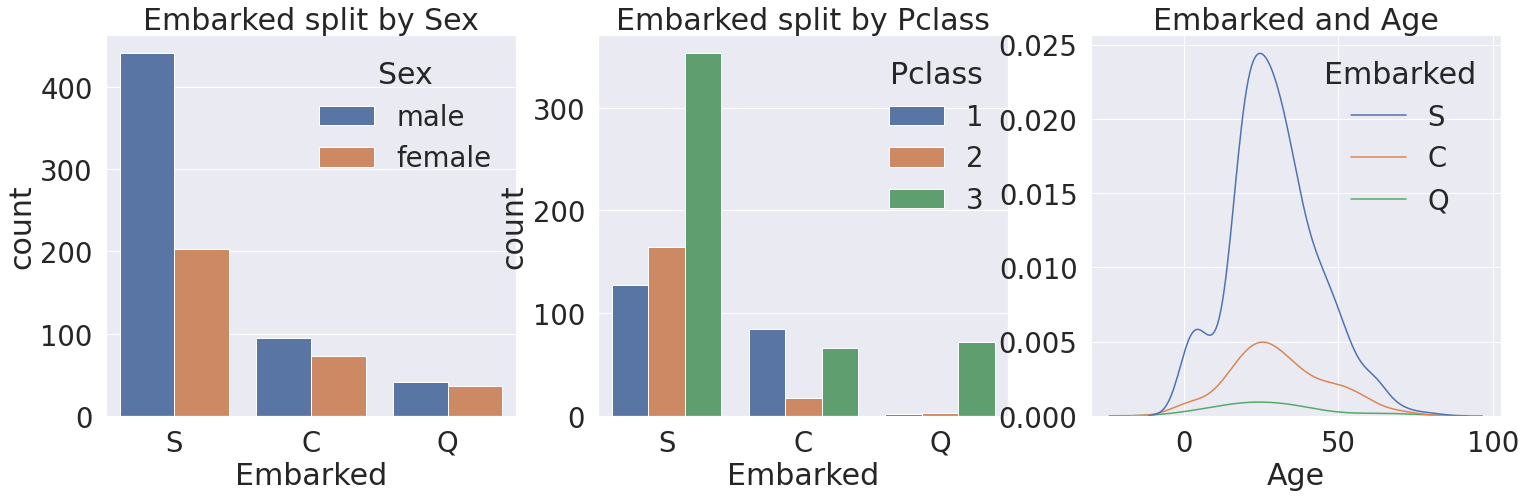

In [25]:
fig,ax = plt.subplots(1,3,figsize=(25,7))
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0])
ax[0].set_title('Embarked split by Sex')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1])
ax[1].set_title('Embarked split by Pclass')
sns.kdeplot('Age',hue='Embarked',data=df_train,ax=ax[2])
ax[2].set_title('Embarked and Age')
ax[2].set_ylabel('')
#C가 생존확률 높은 이유는 Pclass=1 인 사람들이 많이 탔기 때문
#S가 생존확률 낮은 이유는 여자에 비해 남자가 많이 탔고 Pclass=3인 사람들이 많이 탔기 때문

EDA-Sibsp(형제자매),Parch(부모자녀)

Text(0.5, 1.0, 'SibSp')

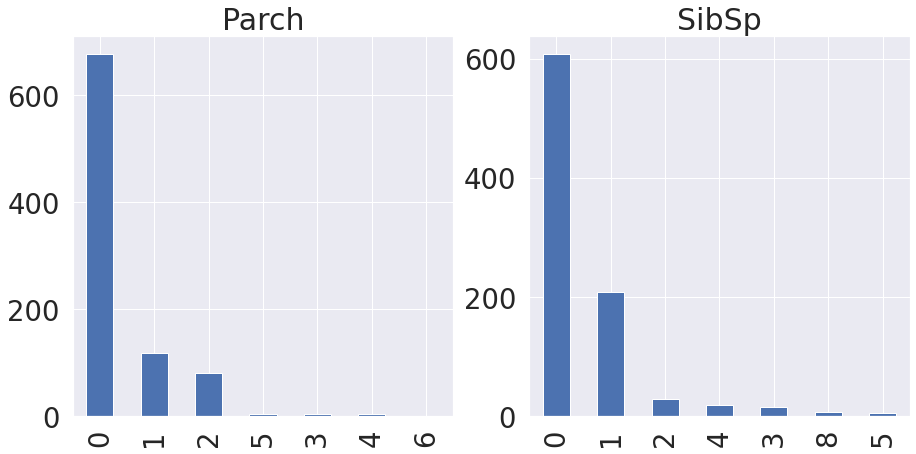

In [26]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
df_train['Parch'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Parch')
df_train['SibSp'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('SibSp')

Text(0.5, 1.0, 'SibSp X Survived')

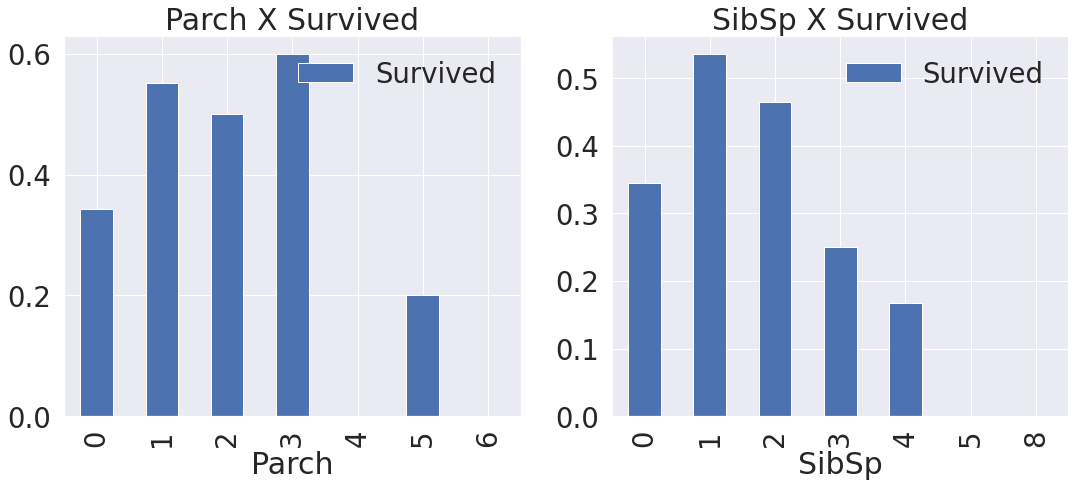

In [27]:
fig,ax=plt.subplots(1,2,figsize=(18,7))
df_train[['Parch','Survived']].groupby('Parch').mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch X Survived')
df_train[['SibSp','Survived']].groupby('SibSp').mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp X Survived')

<AxesSubplot:xlabel='Family'>

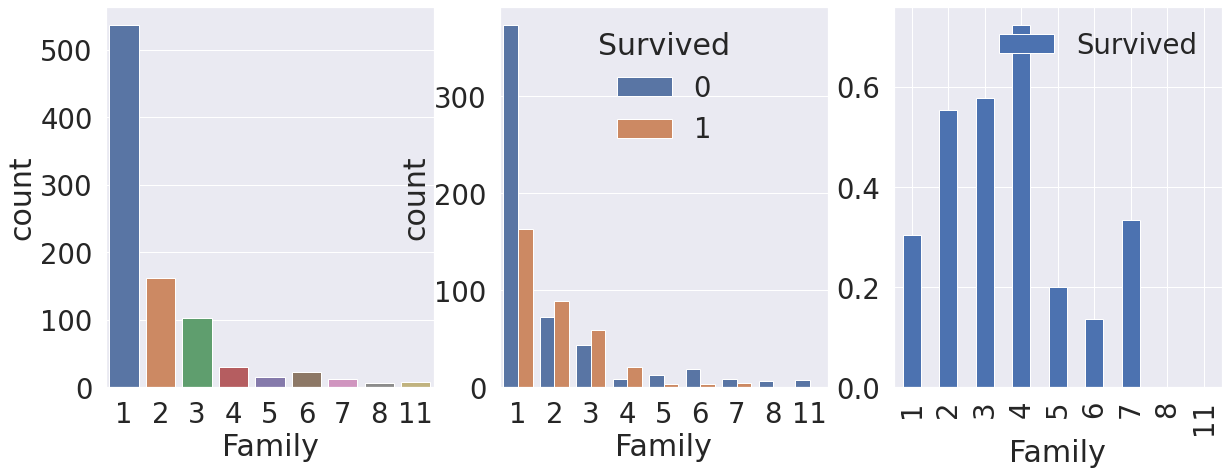

In [28]:
#SibSp + Parch = Family
fig ,ax=plt.subplots(1,3,figsize=(20,7))
df_train['Family']=df_train['SibSp']+df_train['Parch']+1 #No missingno & include self
df_test['Family']=df_test['SibSp']+df_test['Parch']+1
sns.countplot('Family',data=df_train,ax=ax[0])
sns.countplot('Family',hue='Survived',data=df_train,ax=ax[1])
df_train[['Family','Survived']].groupby('Family').mean().plot.bar(ax=ax[2])
#가족구성원이 2~4명일떄 생존률 최대

Text(0.5, 1.0, 'Family and Embarked')

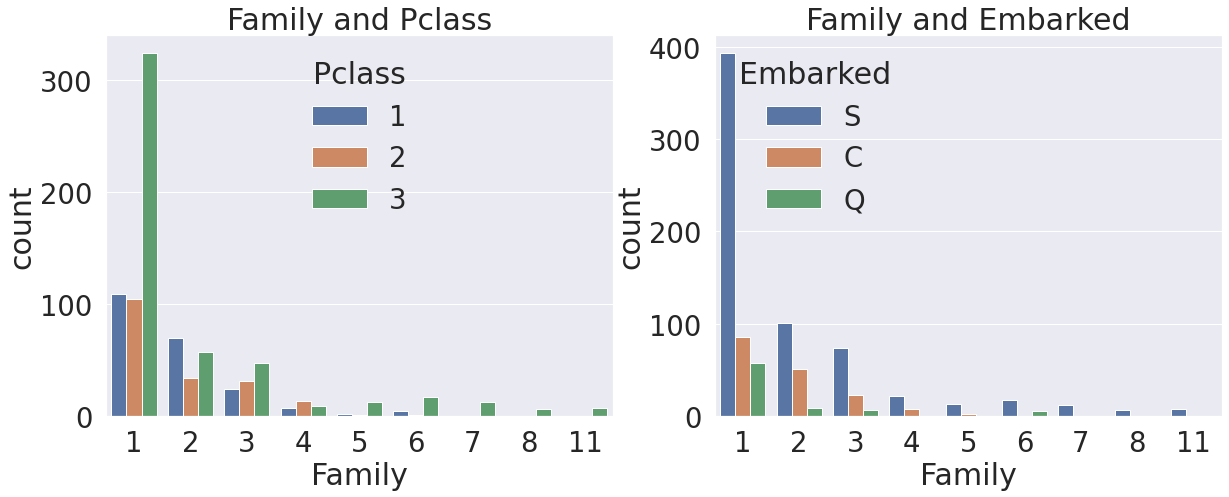

In [29]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.countplot('Family',hue='Pclass',data=df_train,ax=ax[0])
ax[0].set_title('Family and Pclass')
sns.countplot('Family',hue='Embarked',data=df_train,ax=ax[1])
ax[1].set_title('Family and Embarked')
#혼자탄 사람은 대부분 Pclass가 3이고 S에서 탔다.

EDA-Fare

Fare min & max & mean : 0.0 & 512.3292 & 32.20


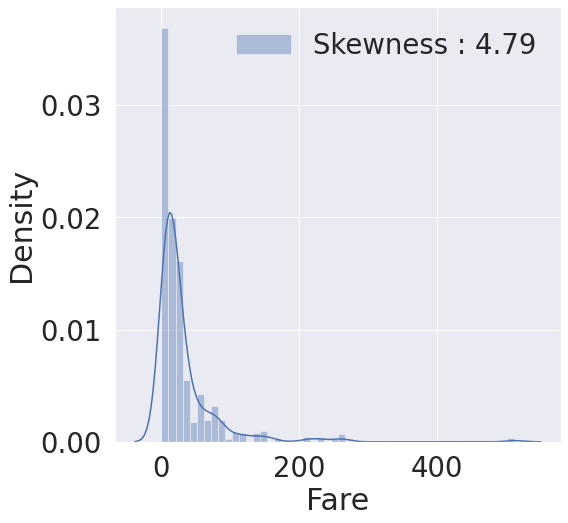

In [30]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'],kde=True,ax=ax,label='Skewness : {:.2f}'.format(df_train['Fare'].skew())) #kde + hist skew:비대칭도 확률분포의 비대칭도를 표시
g.legend(loc='best')
print('Fare min & max & mean : {} & {} & {:.2f}'.format(df_train.Fare.min(), df_train.Fare.max(), df_train.Fare.mean()))
#이렇게 skew가 높은채로 학습시키면 예측력 떨어질수도 -> log취해줌 map함수 이용

In [31]:
df_train.loc[df_train['Fare'].isnull(),'Fare']=df_train['Fare'].mean() # NULL 처리 : insull()이 True인 Fare행들 return 평균값으로 대체 same with : df_train['Fare'].fillna(df_train['Fare'].mean())
df_train['Fare']=df_train['Fare'].map(lambda x: np.log(x) if x>0 else 0) #feature engineering
df_test.loc[df_test['Fare'].isnull(),'Fare']=df_test['Fare'].mean()
df_test['Fare']=df_test['Fare'].map(lambda x: np.log(x) if x>0 else 0)

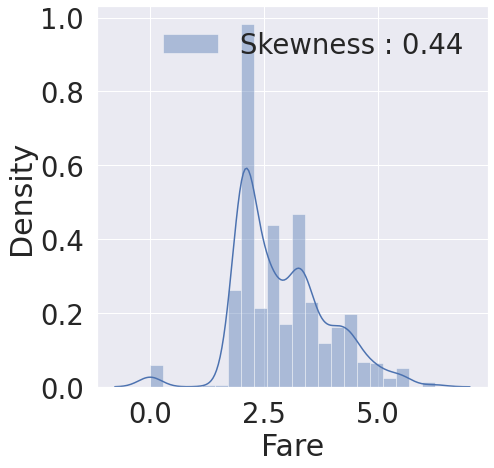

In [32]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
g=sns.distplot(df_train['Fare'],kde=True,label='Skewness : {:.2f}'.format(df_train['Fare'].skew())) #skew : 비대칭도가 현저히 감소 모델링에 수월
g.legend(loc='best')

EDA-Cabin(80% is missing) -> not modelling

EDA-Ticket(self thinking ->how to use it?)

Feature engineering

In [33]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

fill Null

Text(0.5, 1.0, 'df_test Null bar')

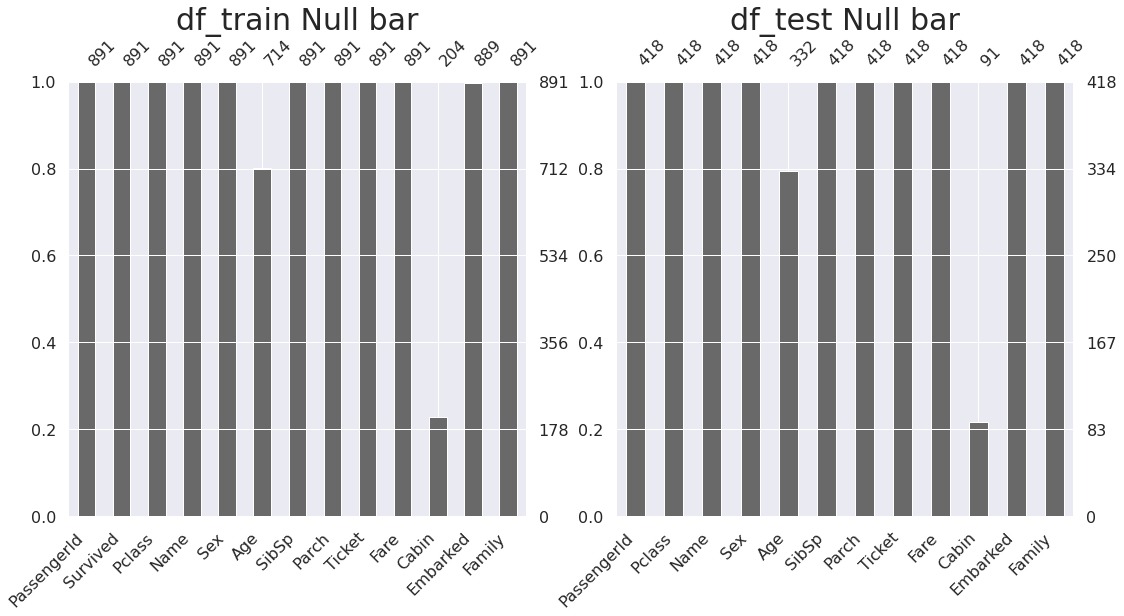

In [34]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
msno.bar(df_train,ax=ax[0])
ax[0].set_title('df_train Null bar')
msno.bar(df_test,ax=ax[1])
ax[1].set_title('df_test Null bar')

Fillna -Age

In [35]:
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [36]:
pd.crosstab(df_train['Sex'],df_train['Initial'],margins=True).style.background_gradient('summer_r') #Checking Initial with Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [37]:
df_train['Initial'].replace(['Capt','Don','Dr','Major','Sir'],'Mr',inplace=True)
df_train['Initial'].replace(['Countess','Lady','Mlle','Mme','Ms'],['Mrs','Mrs','Miss','Miss','Miss'],inplace=True)
df_train['Initial'].replace(['Col',"Jonkheer",'Rev'],'Other',inplace=True)
df_test['Initial'].replace('Dr','Mr',inplace=True)
df_test['Initial'].replace(['Dona','Ms'],'Miss',inplace=True)
df_test['Initial'].replace(['Rev','Col'],'Other',inplace=True)

In [38]:
df_train[['Initial','Age','Survived']].groupby('Initial',as_index=True).mean()

,Age,Survived
Initial,,
Master,4.574167,0.575000
Miss,21.860000,0.704301
Mr,32.739609,0.162571
Mrs,35.981818,0.795276
Other,45.888889,0.111111


In [39]:
Initial_list=['Master','Miss','Mr','Mrs','Other']
for init in Initial_list:
    df_train.loc[(df_train['Initial']==init) & (df_train['Age'].isnull()),'Age']=df_train[['Initial','Age']].groupby('Initial',as_index=True).mean().Age[init]
for init in Initial_list:
    df_test.loc[(df_test['Initial']==init) & (df_test['Age'].isnull()),'Age']=df_test[['Initial','Age']].groupby('Initial',as_index=True).mean().Age[init]
#Initial별로 평균나이를 이용해 fill null

Fillna-Embarked

In [40]:
df_train.loc[df_train['Embarked'].isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN,1,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN,1,Mrs


In [41]:
df_train['Embarked'].fillna('S',inplace=True)

Change Age,Initial,Emberked,Sex #수치화 해야 학습시킬 수 있음

In [42]:
#loc을 이용해 하나하나 처리 or apply 또는 map이용
def age_cat(age):
    if age<10:
        return 0
    elif age<20:
        return 1
    elif age<30:
        return 2
    elif age<40:
        return 3
    elif age<50:
        return 4
    elif age<60:
        return 5
    elif age<70:
        return 6
    elif age<80:
        return 7
    else:
        return 8
df_train['Age_cat']=df_train['Age'].map(age_cat)
df_test['Age_cat']=df_test['Age'].map(age_cat)

In [43]:
df_train['Initial'].replace(['Master','Miss','Mr','Mrs','Other'],[0,1,2,3,4],inplace=True) #Master=0, Miss=1, Mr=2, Mrs=3, Other=4
df_test['Initial']=df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

In [44]:
df_train['Embarked'].replace(['C','Q','S'],[0,1,2],inplace=True) #S:0 C:1 Q:2
df_test['Embarked'].replace(['C','Q','S'],[0,1,2],inplace=True)

In [45]:
df_train['Sex'].replace(['female','male'],[0,1],inplace=True) #male:0 female:1
df_test['Sex'].replace(['female','male'],[0,1],inplace=True)

Pearson Correlation (-1~1)

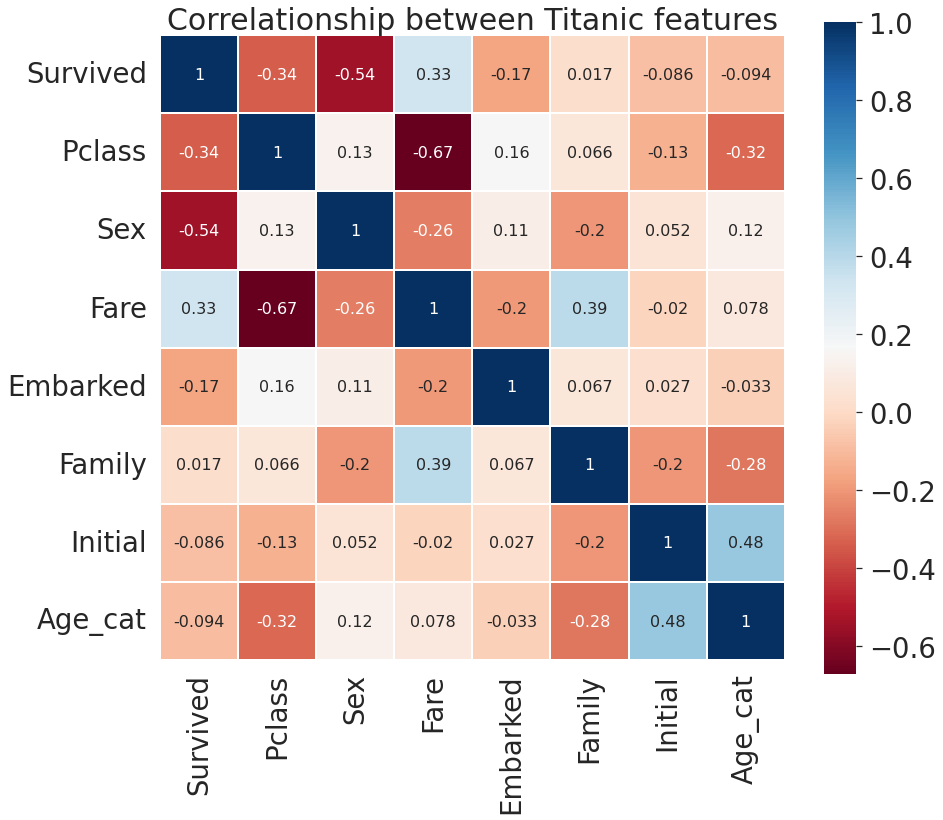

In [46]:
#feature가 다양하기 떄문에 feature간의 상관관계 파악위해 heatmapplot()과 df.corr() 사용 -> [ -1: 음의상관관계 0: 관계없음 1: 양의 상관관계 ]
heatmap_data=df_train[['Survived','Pclass','Sex','Fare','Embarked','Family','Initial','Age_cat']]
colormap=plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlationship between Titanic features')
sns.heatmap(heatmap_data.astype(float).corr(),linewidth=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True,annot_kws={'size':16})
del heatmap_data
#서로 강한 상관관계에 있는 feature들이 없다->불필요한 feature는 없다.

One-hot encoding

In [47]:
#성능을 높이기 위해 one-hot encoding -> 그냥 수치화한 상태 : data끼리 관계성 생김
df_train=pd.get_dummies(df_train,columns=['Initial'],prefix='Initial') #pd.get_dummies(df_train['Initial'])->자체 df생성 prefix : columns name 설정
df_test=pd.get_dummies(df_test,columns=['Initial'],prefix='Initial')

In [48]:
df_train=pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test=pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')
#sklearn -> Labelencoder + OneHotencoder 도 이용가능
#category가 너무 많을경우 이 방법 이용시 columns가 너무 많아지므로 다른 방법 이용해야함

In [49]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Age'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Age'],axis=1,inplace=True)
#필요한 Feature들만 남긴다

Building Machine Learning Model and prediction using the trained model

In [50]:
#traget classes -> exist and binary -> classification 지도학습 분류
from sklearn.ensemble import RandomForestClassifier #유명한 분류 ML모델
from sklearn import metrics #모델 평가
from sklearn.model_selection import train_test_split

In [51]:
X_train=df_train.drop(['Survived'],axis=1).values
target_lable=df_train['Survived'].values
X_test=df_test.values

In [52]:
X_tr,X_vld,y_tr,y_vld=train_test_split(X_train,target_lable,random_state=2021,test_size=0.3)

In [53]:
model=RandomForestClassifier().fit(X_tr,y_tr)
prediction=model.predict(X_vld)

In [54]:
print("총 {}명의 피실험자 중 {:.2f}% 정확도로 생존을 맞춤".format(y_vld.shape[0],100*model.score(X_vld,y_vld)))
print('총 {}명의 피실험자 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명의 피실험자 중 79.48% 정확도로 생존을 맞춤
총 268명의 피실험자 중 79.48% 정확도로 생존을 맞춤


가중치 체크

In [55]:
from pandas import Series
feature_importance=model.feature_importances_
Series_feat_imp=Series(feature_importance,index=df_test.columns)

<AxesSubplot:xlabel='Feature Importance', ylabel='Feature'>

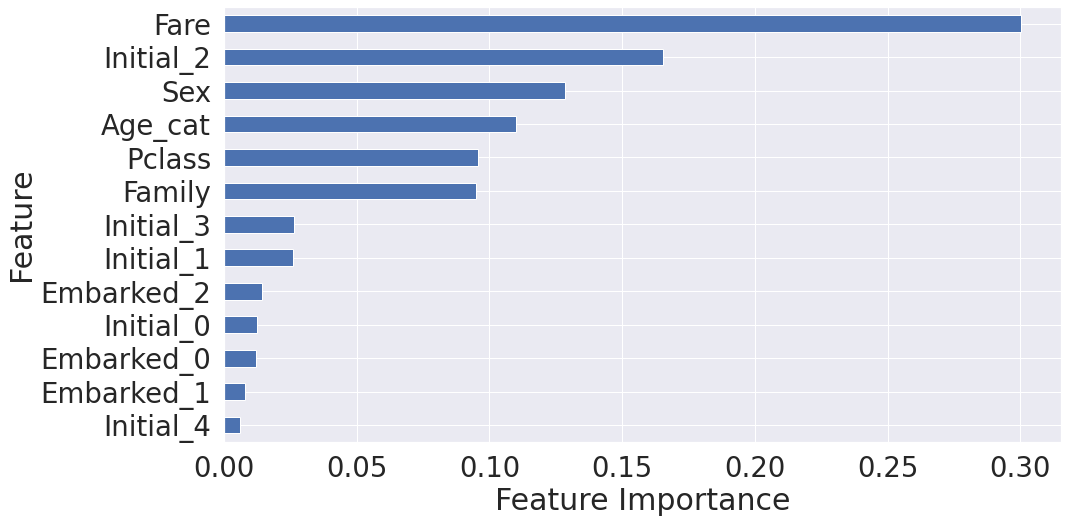

In [56]:
plt.figure(figsize=(15,8))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
Series_feat_imp.sort_values(ascending=True).plot.barh() #barh() -> 수평으로 그림

submit

In [57]:
submission=pd.read_csv('../input/titanic/gender_submission.csv')
submission.shape[0]

418

In [58]:
prediction=model.predict(X_test)
submission['Survived']=prediction

In [59]:
submission.to_csv('./my_first_submission.csv',index=False)